In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [2]:
# Loading data from file
data = scipy.io.loadmat('sampleEEGdata.mat')['EEG']
data = {n: np.squeeze(data[n][0, 0])[()]
        for n in data.dtype.names}

# Getting eeg data
eeg_data = np.array(data['data'])

# Organizing data into start/end indexes for 0-800ms
time = np.array(data['times'])
time_idx = np.where((time >= 0) & (time <= 800))[0]
start = time_idx[0]
end = time_idx[-1]

In [3]:
# Number of channels
M = data['nbchan']

# Number of trials
N = data['trials']

In [4]:
# Initializing covariance matrix
cov_mat = np.zeros((M, M))

for trial in range(N):
    tmp_data = eeg_data[:, start:end+1, trial]
    tmp_data = (tmp_data.T - np.mean(tmp_data, axis=1)).T
    cov_mat = cov_mat + (tmp_data@tmp_data.T)/(end-start)

cov_mat = cov_mat/N

In [5]:
erp = np.mean(eeg_data[:, start:end, :], axis=2)
tmp_data = (erp.T - np.mean(erp)).T
cov_matA = tmp_data@tmp_data.T/(end-start)

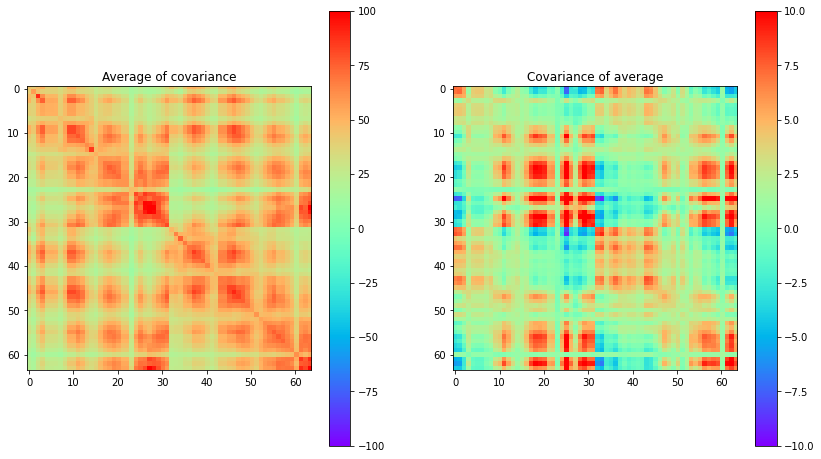

In [6]:
cmap = 'rainbow'
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.imshow(cov_mat, cmap=cmap)
plt.title('Average of covariance')
plt.clim(-100, 100)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(cov_matA, cmap=cmap)
plt.title('Covariance of average')
plt.clim(-10, 10)
plt.colorbar()
plt.show()